In [73]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "/Users/kurtshiple/Desktop/HomeworkResourcesDownloads/csvs/city_data.csv"
ride_data_to_load = "/Users/kurtshiple/Desktop/HomeworkResourcesDownloads/csvs/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_set = pd.merge(ride_data, city_data, how="left", on=["city"])

# Display the data table for preview
data_set.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Grouping Data Together by City

In [74]:
#Number of rides per city
ridespercitylist = data_set.groupby('city').ride_id.count()
ridespercitydf = pd.DataFrame(ridespercitylist)
ridespercitydf.columns = ["rides_per_city"]



In [75]:
#average fare per city
farelist = data_set.groupby('city').fare.mean()
faredf = pd.DataFrame(farelist)


In [76]:
typelist = data_set.groupby('city').type.first()
typedf = pd.DataFrame(typelist)


In [77]:
#number of drivers per city
drivercountlist = data_set.groupby('city').driver_count.first()
drivercountdf = pd.DataFrame(drivercountlist)


In [78]:
#Merging the previous dataframes together into one greater frame.
set1 = pd.merge(ridespercitydf, faredf, how="left", on=["city"])
set2 = pd.merge(set1, typedf, how="left", on=["city"])
bubble_plot_set = pd.merge(set2, drivercountdf, how="left", on=["city"])
bubble_plot_set.head(5)

,rides_per_city,fare,type,driver_count
city,,,,
Amandaburgh,18,24.641667,Urban,12
Barajasview,22,25.332273,Urban,26
Barronchester,16,36.422500,Suburban,11
Bethanyland,18,32.956111,Suburban,22
Bradshawfurt,10,40.064000,Rural,7


In [79]:
#This is the strategy for the different colors: Make a filtered set based on city type on overlay each plot over
#the same chart.
urbanset = bubble_plot_set.loc[bubble_plot_set['type'] == 'Urban'] 
suburbanset = bubble_plot_set.loc[bubble_plot_set['type'] == 'Suburban'] 
ruralset = bubble_plot_set.loc[bubble_plot_set['type'] == 'Rural'] 

## Bubble Plot of Ride Sharing Data

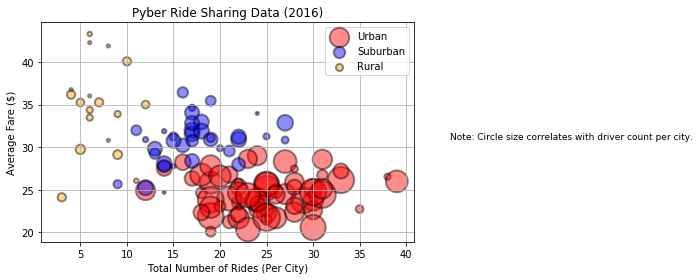

In [80]:
# Build the scatter plots for each city types
Urban = plt.scatter(urbanset["rides_per_city"], urbanset["fare"], marker="o", c = "red",
                              edgecolors="black", s=urbanset["driver_count"]*10, alpha=0.45, label = "Urban", linewidths= 2)
Suburban = plt.scatter(suburbanset["rides_per_city"], suburbanset["fare"], marker="o", c = "blue",
                              edgecolors="black", s=suburbanset["driver_count"]*10, alpha=0.45, label = "Suburban", linewidths= 2)
Rural = plt.scatter(ruralset["rides_per_city"], ruralset["fare"], marker="o", c = "orange",
                              edgecolors="black", s=ruralset["driver_count"]*10, alpha=0.45, label = "Rural", linewidths= 2)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Create a legend
plt.legend(handles=[Urban, Suburban, Rural], loc="best")
# Incorporate a text label regarding circle size
textstr = "Note: Circle size correlates with driver count per city."
plt.gcf().text(1.05, .5, textstr, fontsize=9)
# Save Figure
#plt.savefig("../Images/IceCreamSales.png")
plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework5:Pyber/AverageFarevsNumberofRides",bbox_inches='tight')
plt.show()

## Total Fares by City Type

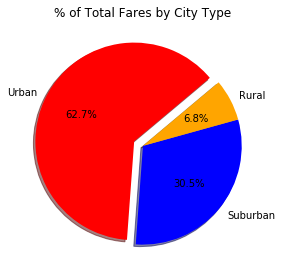

In [81]:
# Calculate Type Percents
urbancount = data_set.loc[data_set['type'] == 'Urban']
urbanfaresum = urbancount["fare"].sum()


suburbancount = data_set.loc[data_set['type'] == 'Suburban']
suburbanfaresum = suburbancount["fare"].sum()

ruralcount = data_set.loc[data_set['type'] == 'Rural']
ruralfaresum = ruralcount["fare"].sum()

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urbanfaresum, suburbanfaresum, ruralfaresum]

# The colors of each section of the pie chart
colors = ["red", "blue", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

#-----

# Creates the pie chart based upon the values above
plt.title("% of Total Fares by City Type")
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
# Save Figure
plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework5:Pyber/%ofTotalFaresbyCityType")
plt.show()

## Total Rides by City Type

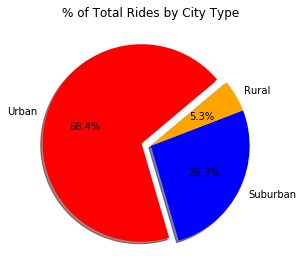

In [82]:
# Calculate Type Percents
urbancount = len(data_set.loc[data_set['type'] == 'Urban'])



suburbancount = len(data_set.loc[data_set['type'] == 'Suburban'])


ruralcount = len(data_set.loc[data_set['type'] == 'Rural'])

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urbancount, suburbancount, ruralcount]

# The colors of each section of the pie chart
colors = ["red", "blue", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

#-----

# Creates the pie chart based upon the values above
plt.title("% of Total Rides by City Type")
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
# Save Figure
plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework5:Pyber/%ofTotalRidesbyCityType")
plt.show()

## Total Drivers by City Type

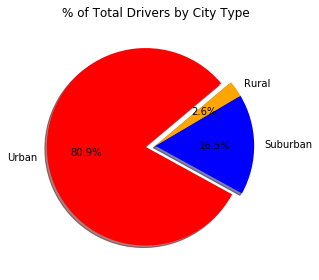

In [83]:
# Calculate Type Percents
urbancities = bubble_plot_set.loc[bubble_plot_set['type'] == 'Urban']
urbandriversum = urbancities['driver_count'].sum()


suburbancities = bubble_plot_set.loc[bubble_plot_set['type'] == 'Suburban']
suburbandriversum = suburbancities['driver_count'].sum()


ruralcities = bubble_plot_set.loc[bubble_plot_set['type'] == 'Rural']
ruraldriversum = ruralcities['driver_count'].sum()

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urbandriversum, suburbandriversum, ruraldriversum]

# The colors of each section of the pie chart
colors = ["red", "blue", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

#-----

# Creates the pie chart based upon the values above
plt.title("% of Total Drivers by City Type")
    # Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
# Save Figure
plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework5:Pyber/%ofTotalDriversbyCityType")
plt.show()

# Analysis: Three Observable Trends

1.) One observable trend can be seen by looking at the first graph charting the average fare against the 
total number of rides. As the number of drivers available grows, the average fare tends to drop.

2.) There is an observable relationship between city type and number of drivers available. That is, urban cities 
typically have more drivers available and rural have less.

3.) Rural drivers make more money per fare than urban or suburban drivers.
